# Results

In [3]:
import pandas as pd


metrics = [
        "accuracy",
        "balanced_accuracy",
        "f1",
        "precision",
        "recall",
        "specificity",
        "ROC_AUC",
        "MCC",
    ]

In [45]:
import os


all_models_results = {}
main_result_folder = os.path.join(".", "results")
datasets = ["hyperactiv", "psykose", "depresjon"]
models = ["LR", "RF", "SVM", "GBM"]
types = ["full_24h", "8_21_day", "8_21_night", "6_22_day", "6_22_night"]

for dataset in datasets:
    paths_to_results_folder = os.path.join(main_result_folder, dataset)
    all_models_results[dataset] = {}
    for t in types:
        all_models_results[dataset][t] = []
        for model in models:
            model_mean_results = pd.read_csv(os.path.join(paths_to_results_folder, f"final_scores_{t}_{model}.csv"))["Mean"]
            model_mean_results.index = metrics
            model_mean_results.name = f"{t} {model}"
            all_models_results[dataset][t].append(model_mean_results)
            

In [50]:
def get_dataset_part_results(dataset_results_folder, models):
    results = []
    for model in models:
        model_mean_results = pd.read_csv(os.path.join(dataset_results_folder, f"{model}.csv"))["Mean"]
        model_mean_results.index = metrics
        name_parts = model.split("_")
        model_mean_results.name = f"{name_parts[-2]} {name_parts[-1]}"
        results.append(model_mean_results)
    return results


In [32]:
import numpy as np
import matplotlib.pyplot as plt


def plot_final_results(
        models_final_results: list[pd.Series], 
        title: str, 
        one_plot: bool = False, 
        figsize: tuple[float, float] = (10, 6)
) -> None:
    df = pd.concat(models_final_results, axis=1)
    
    if one_plot:
        df.plot(kind='bar', figsize=figsize)
        plt.title(title)
        plt.xlabel('Metrics')
        plt.xticks(rotation=45)
        plt.ylabel('Values')
        plt.legend(title="Models")
        plt.tight_layout()
        plt.show()
    else:
        num_models = len(df.columns)
        colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
        
        num_metrics = len(df.index)
        fig, axes = plt.subplots(nrows=(num_metrics + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

        axes = axes.flatten()
        
        for ax, metric in zip(axes, df.index):
            ax.bar(df.columns, df.loc[metric], color=colors)
            ax.set_title(f'{title}: {metric}')
            ax.set_xlabel('Models')
            ax.set_ylabel('Value')
        
        for ax in axes[len(df.index):]:
            ax.axis('off')
        
        plt.tight_layout()
        plt.show()

In [41]:
def plot_model_comparison(results: dict[str, list[pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = ["full_24h", "8_21_day", "6_22_day", "8_21_night", "6_22_night"]
    
    num_models = len(types)
    colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
    
    fig, axes = plt.subplots(nrows=(len(metrics) + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        data = {}
        for t in types:
            for result in results[t]:
                model_t, model_name = result.name.split()
                data[model_name] = data.get(model_name, []) + [result.iloc[i]]
                
        df = pd.DataFrame(data, index=types)
        
        df.plot(kind='bar', ax=ax)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Value')

    
    plt.tight_layout()
    plt.show()

In [40]:
def plot_day_night_full_comparison(results: dict[str, list[pd.Series]], title: str, figsize: tuple[float, float] = (10, 6)):
    types = ["full_24h", "8_21_day", "6_22_day", "8_21_night", "6_22_night"]
    
    num_models = len(types)
    colors = plt.colormaps['tab10'](np.linspace(0, 1, num_models))
    
    fig, axes = plt.subplots(nrows=(len(metrics) + 1 )// 2, ncols=2, figsize=figsize, sharey=True)

    axes = axes.flatten()
    
    for i, ax in enumerate(axes):
        data = {}
        for t in types:
            for result in results[t]:
                model_t, model_name = result.name.split()
                data[model_t] = data.get(model_t, []) + [result.iloc[i]]
        
                
        df = pd.DataFrame(data, index=models)
        
        df.plot(kind='bar', ax=ax)
        ax.set_title(f'{title}: {metrics[i]}')
        ax.set_xlabel('Models')
        ax.set_ylabel('Value')

    
    plt.tight_layout()
    plt.show()

## Plots

### Hyperactiv

In [51]:
path_to_hyperactive_results_folder = os.path.join(".", "results", "hyperactiv")
day_8_21_models_scores = ["final_scores_8_21_day_LR", "final_scores_8_21_day_RF", "final_scores_8_21_day_SVM", "final_scores_8_21_day_GBM"]
day_6_22_models_scores = ["final_scores_6_22_day_LR", "final_scores_6_22_day_RF", "final_scores_6_22_day_SVM", "final_scores_6_22_day_GBM"]
night_8_21_models_scores = ["final_scores_8_21_night_LR", "final_scores_8_21_night_RF", "final_scores_8_21_night_SVM", "final_scores_8_21_night_GBM"]
night_6_22_models_scores = ["final_scores_6_22_night_LR", "final_scores_6_22_night_RF", "final_scores_6_22_night_SVM", "final_scores_6_22_night_GBM"]
full_24h_models_scores = ["final_scores_full_24h_LR", "final_scores_full_24h_RF", "final_scores_full_24h_SVM", "final_scores_full_24h_GBM"]

In [54]:
results_hyperactive_day_8_21 = get_dataset_part_results(path_to_hyperactive_results_folder, day_8_21_models_scores)
results_hyperactive_day_6_22 = get_dataset_part_results(path_to_hyperactive_results_folder, day_6_22_models_scores)
results_hyperactive_night_8_21 = get_dataset_part_results(path_to_hyperactive_results_folder, night_8_21_models_scores)
results_hyperactive_night_6_22 = get_dataset_part_results(path_to_hyperactive_results_folder, night_6_22_models_scores)
results_hyperactive_full_24h = get_dataset_part_results(path_to_hyperactive_results_folder, full_24h_models_scores)


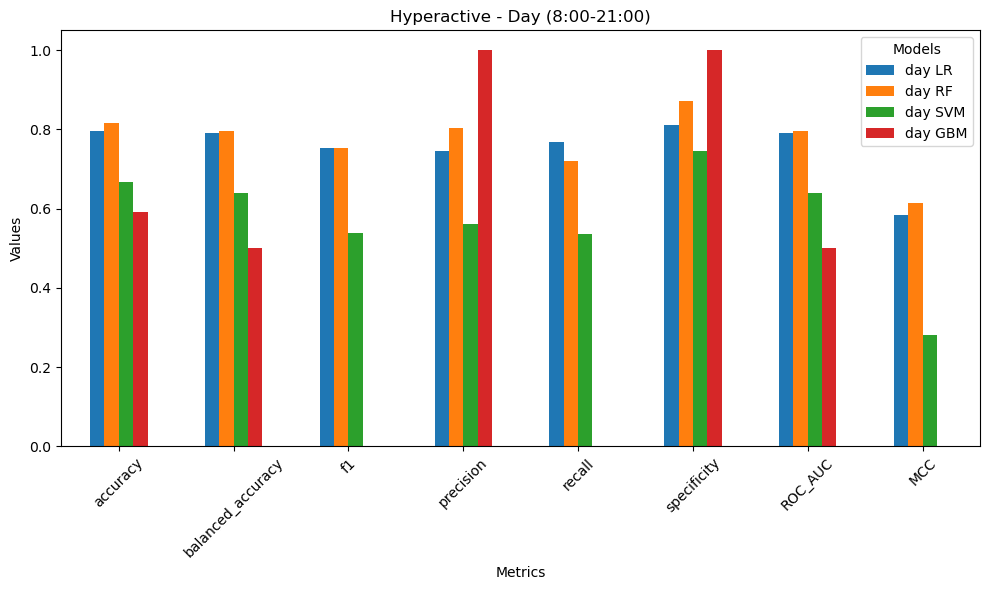

In [53]:
plot_final_results(results_hyperactive_day_8_21, "Hyperactive - Day (8:00-21:00)", one_plot=True)

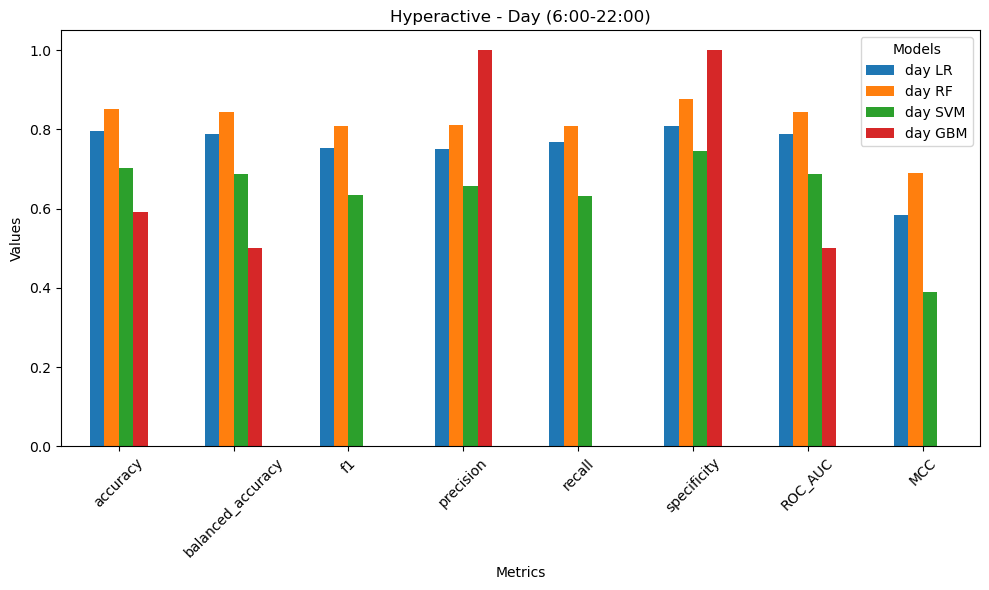

In [55]:
plot_final_results(results_hyperactive_day_6_22, "Hyperactive - Day (6:00-22:00)", one_plot=True)

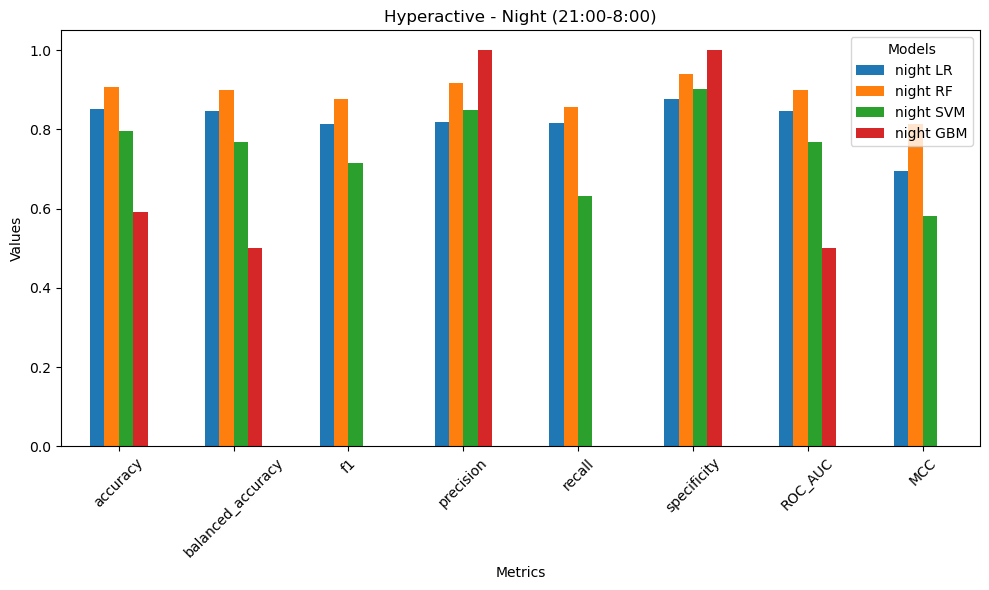

In [56]:
plot_final_results(results_hyperactive_night_8_21, "Hyperactive - Night (21:00-8:00)", one_plot=True)

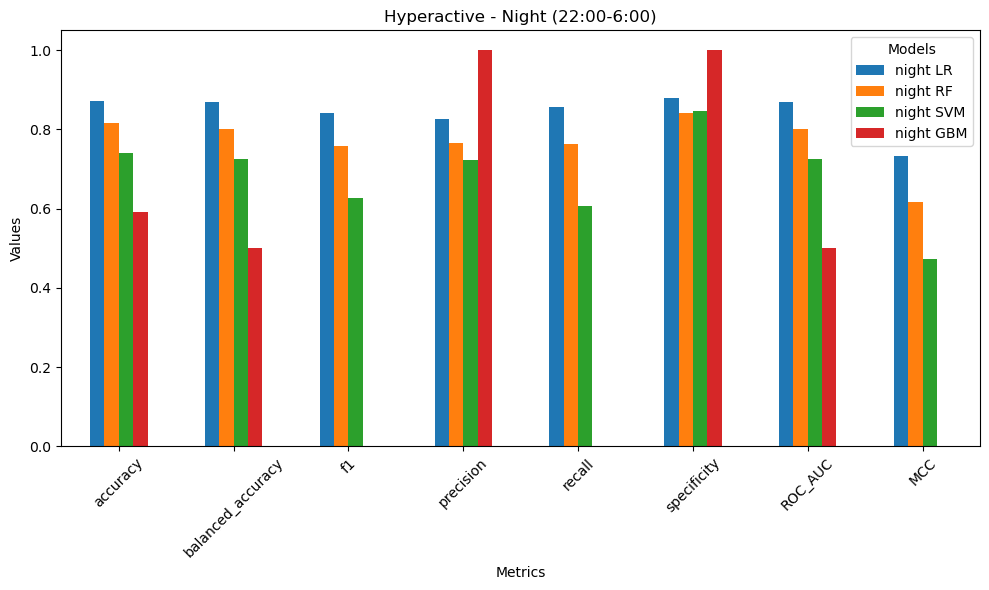

In [57]:
plot_final_results(results_hyperactive_night_6_22, "Hyperactive - Night (22:00-6:00)", one_plot=True)

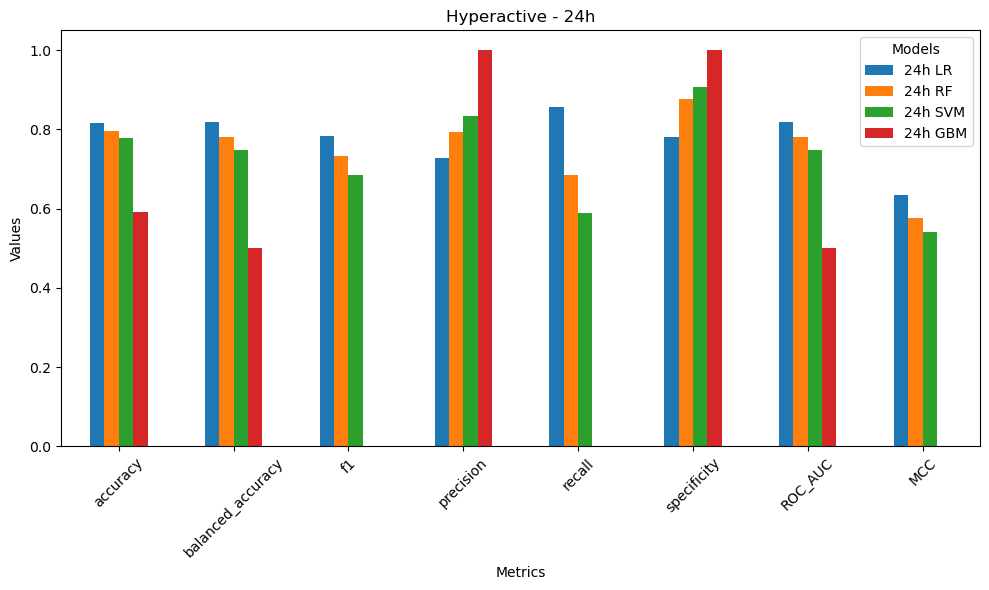

In [58]:
plot_final_results(results_hyperactive_full_24h, "Hyperactive - 24h", one_plot=True)

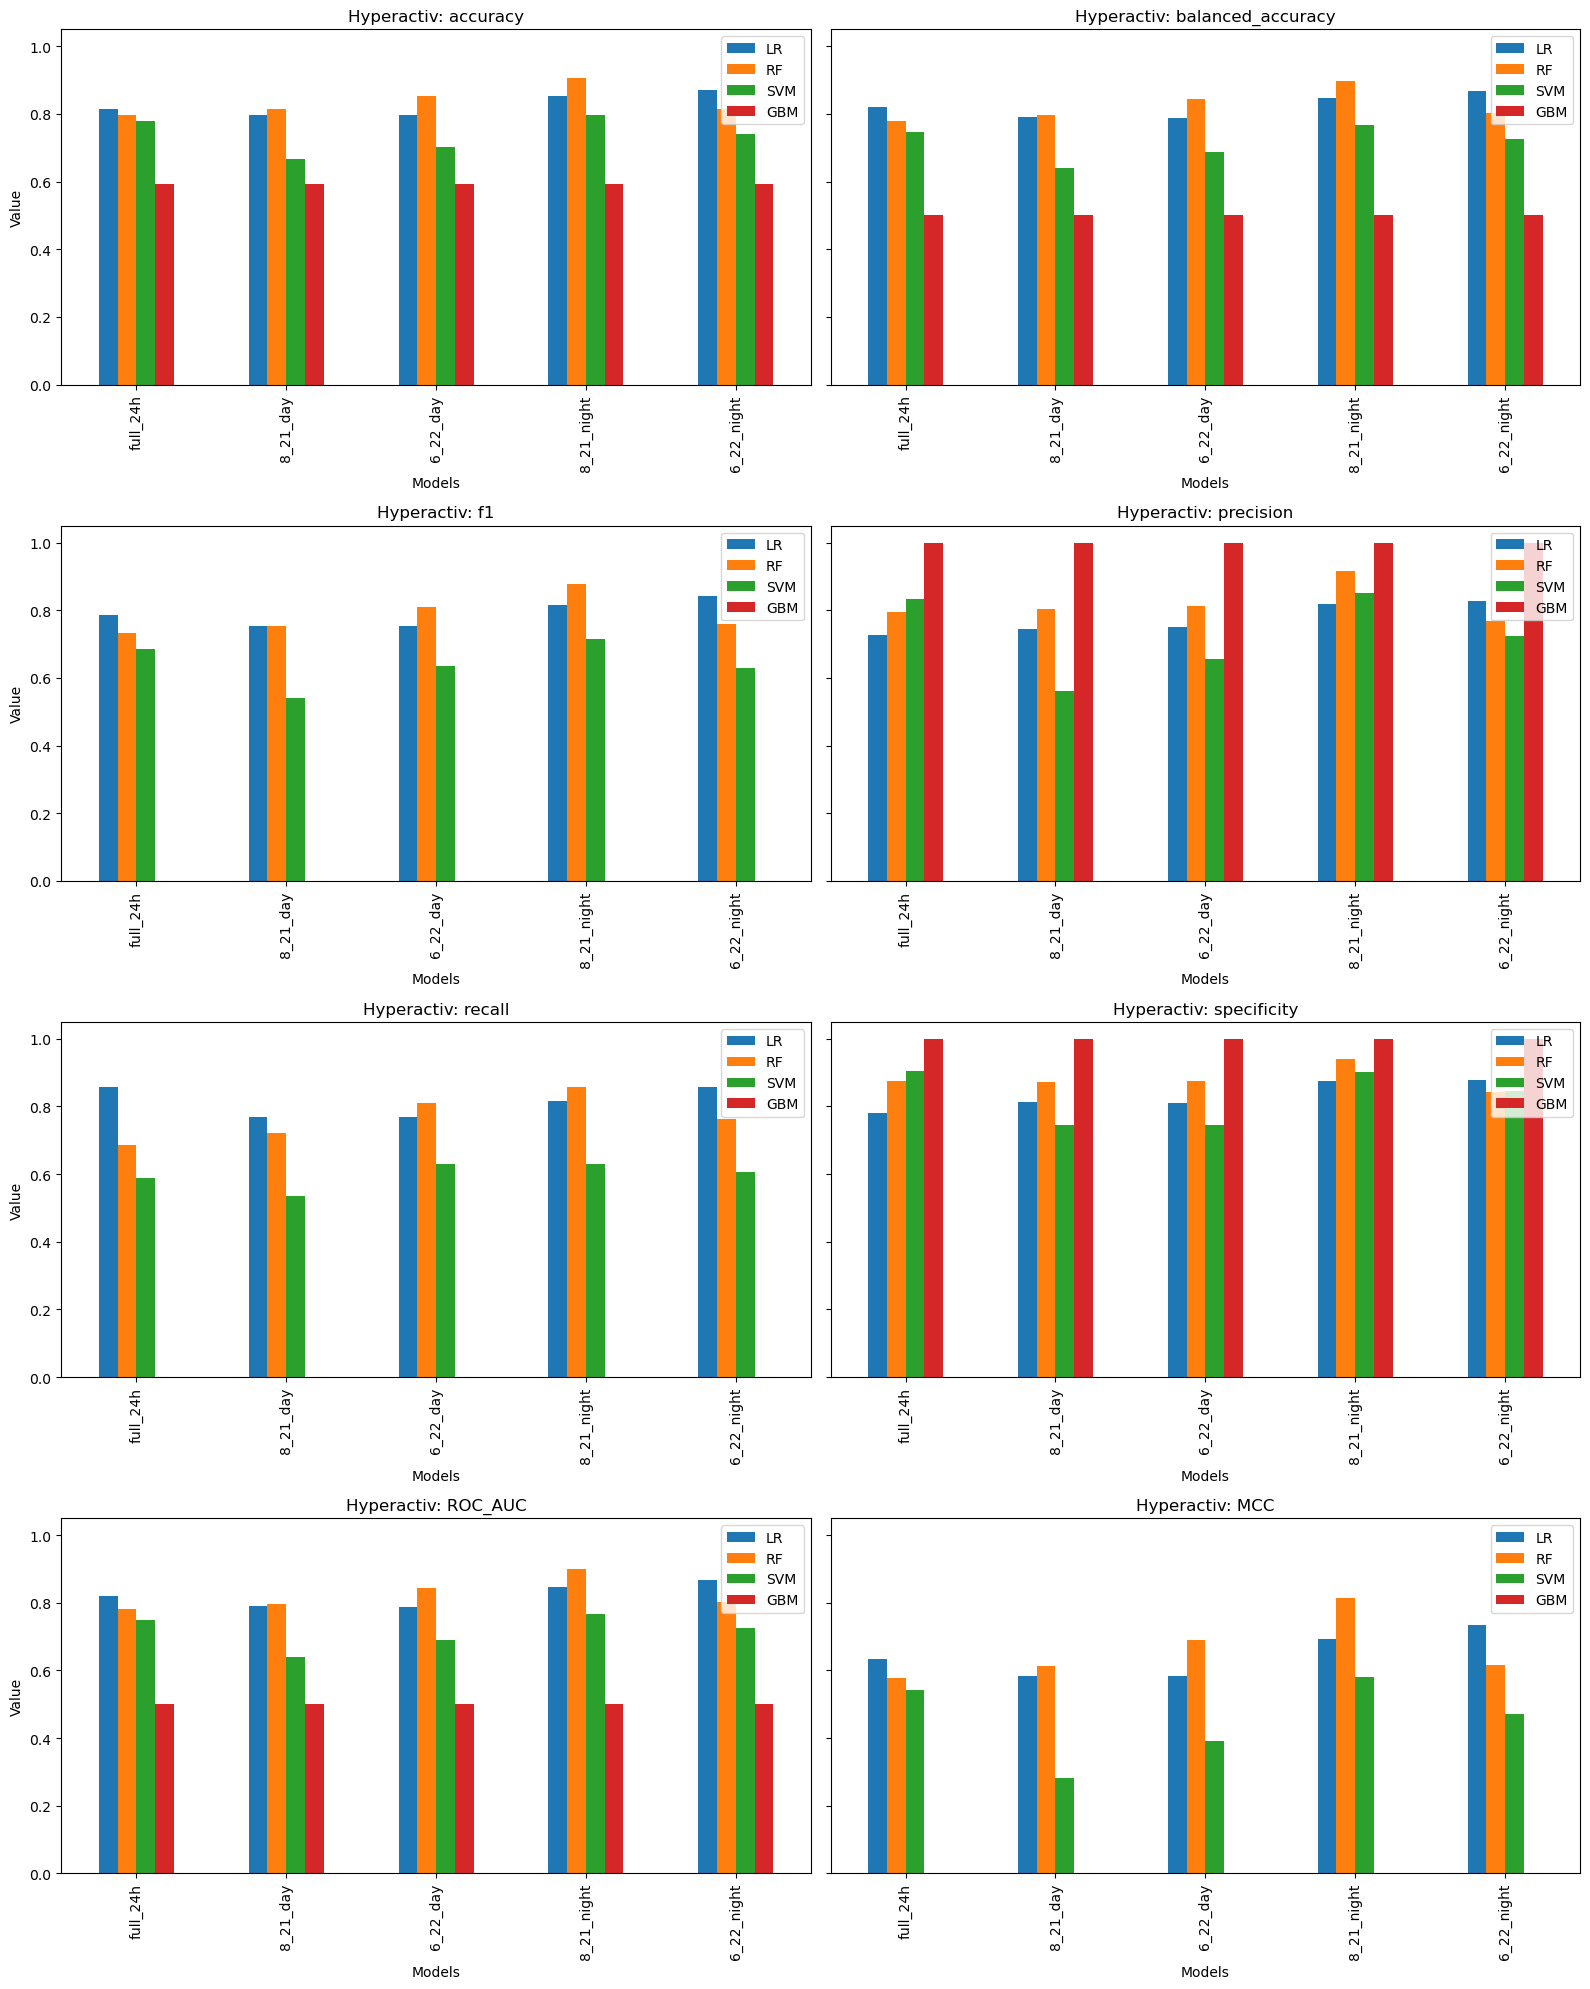

In [59]:
plot_model_comparison(all_models_results["hyperactiv"], "Hyperactiv", figsize=(16, 20))

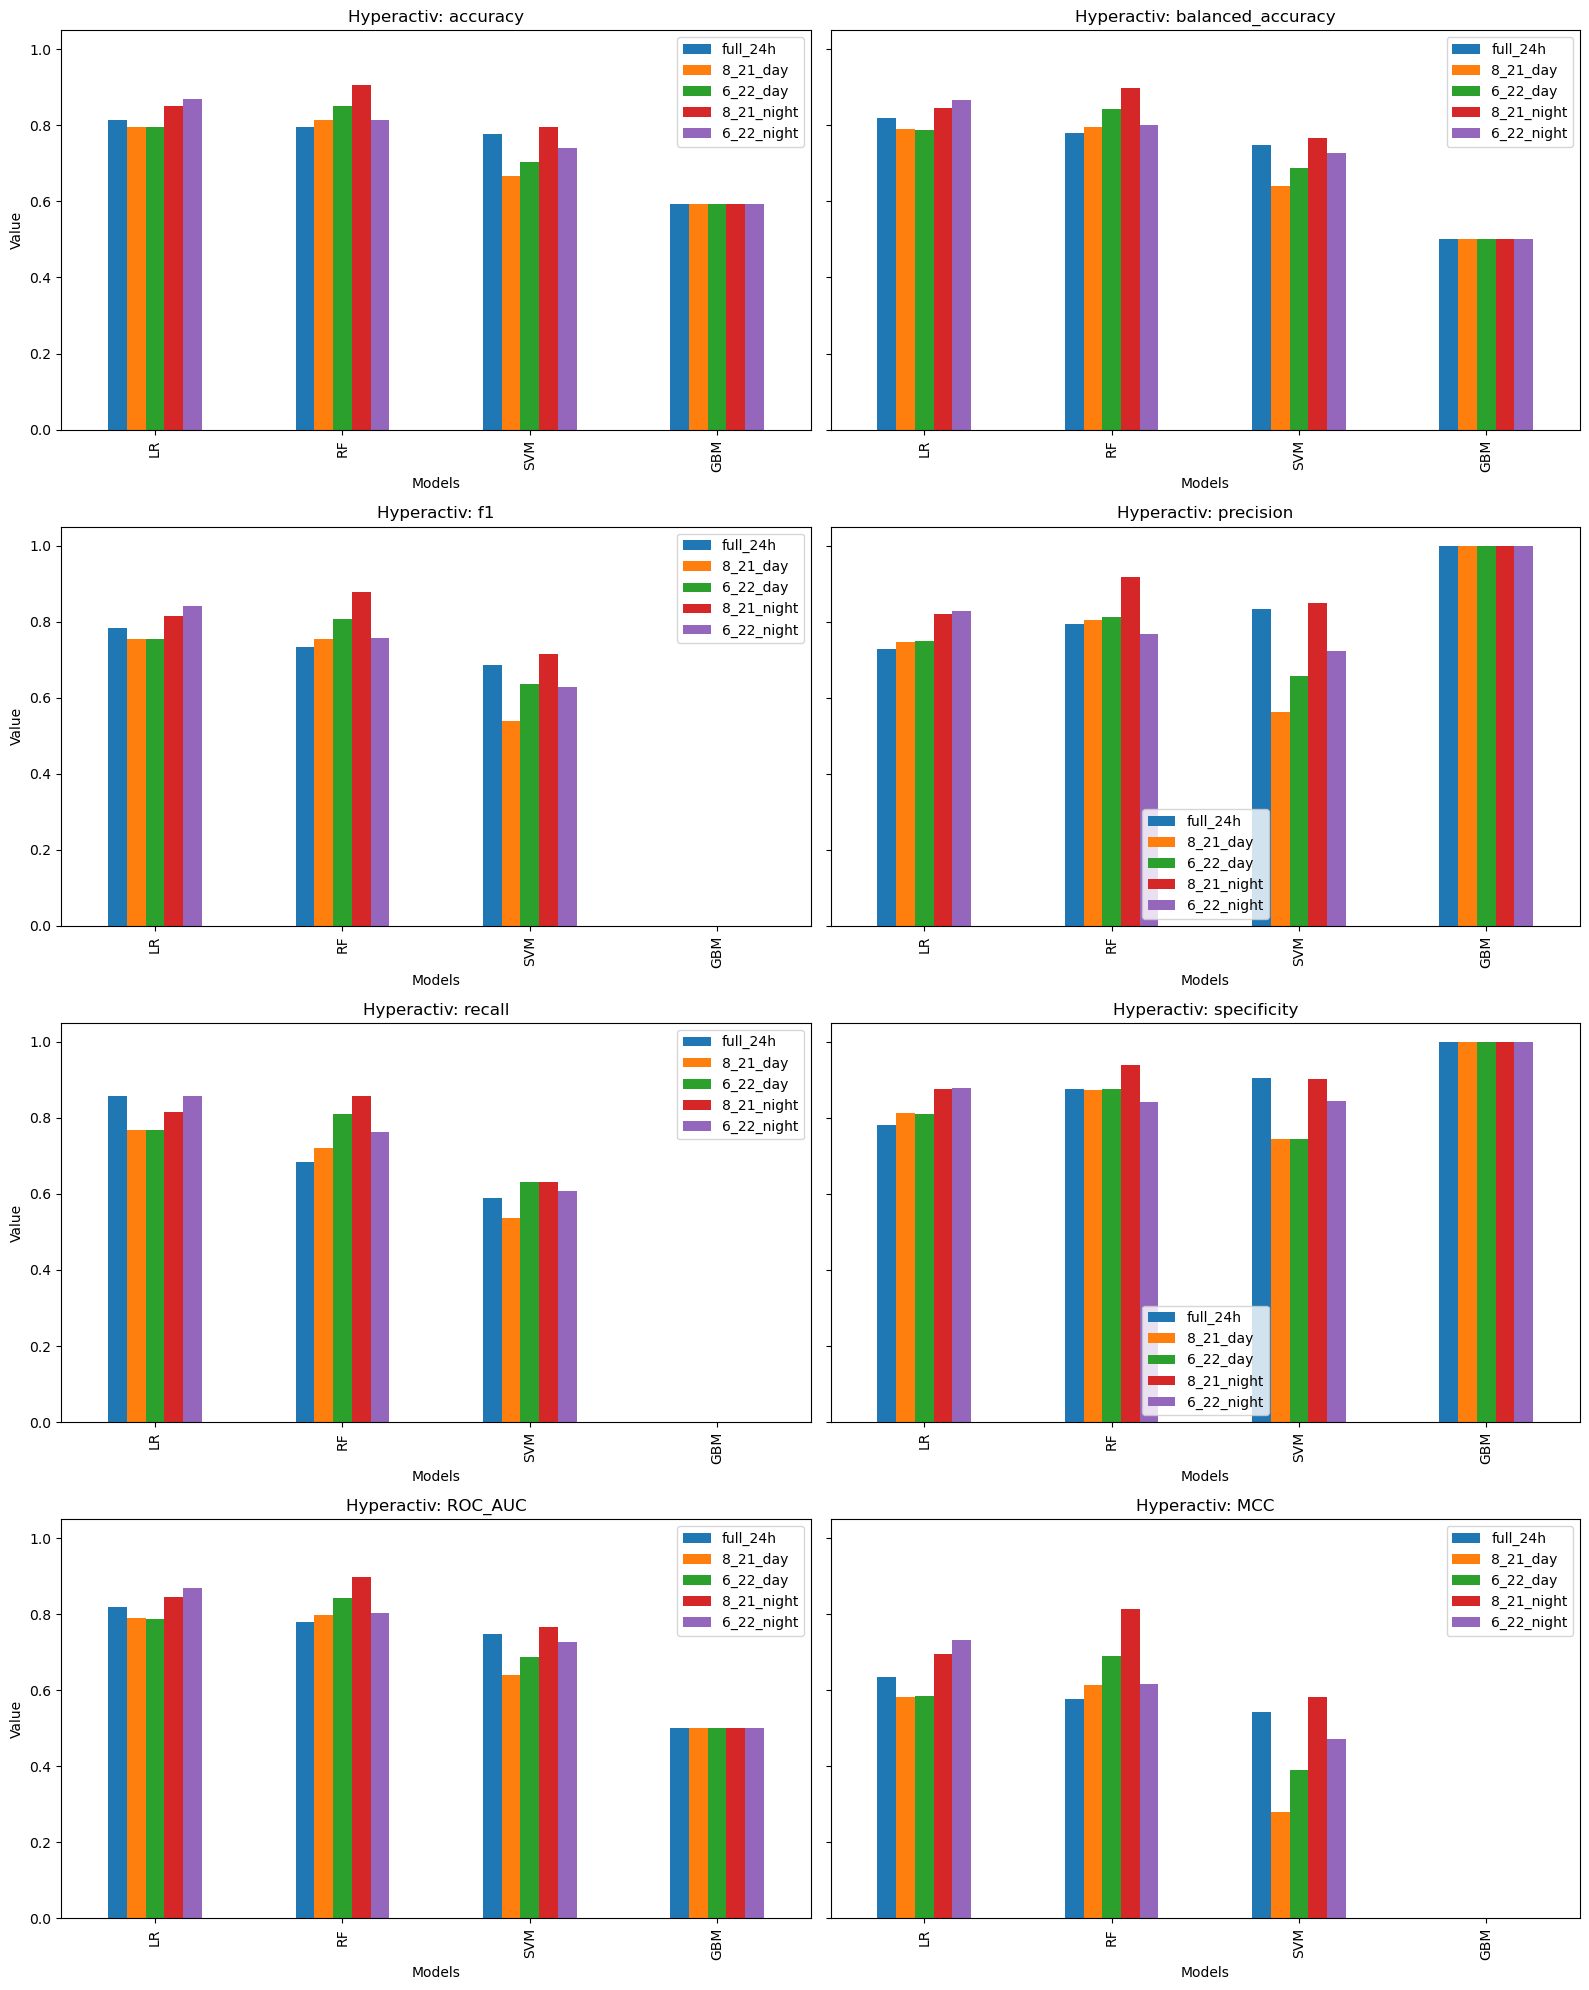

In [60]:
plot_day_night_full_comparison(all_models_results["hyperactiv"], "Hyperactiv", figsize=(16, 20))

### Depresjon

In [61]:
path_to_depresjon_results_folder = os.path.join(".", "results", "depresjon")

In [62]:
results_depresjon_day_8_21 = get_dataset_part_results(path_to_depresjon_results_folder, day_8_21_models_scores)
results_depresjon_day_6_22 = get_dataset_part_results(path_to_depresjon_results_folder, day_6_22_models_scores)
results_depresjon_night_8_21 = get_dataset_part_results(path_to_depresjon_results_folder, night_8_21_models_scores)
results_depresjon_night_6_22 = get_dataset_part_results(path_to_depresjon_results_folder, night_6_22_models_scores)
results_depresjon_full_24h = get_dataset_part_results(path_to_depresjon_results_folder, full_24h_models_scores)

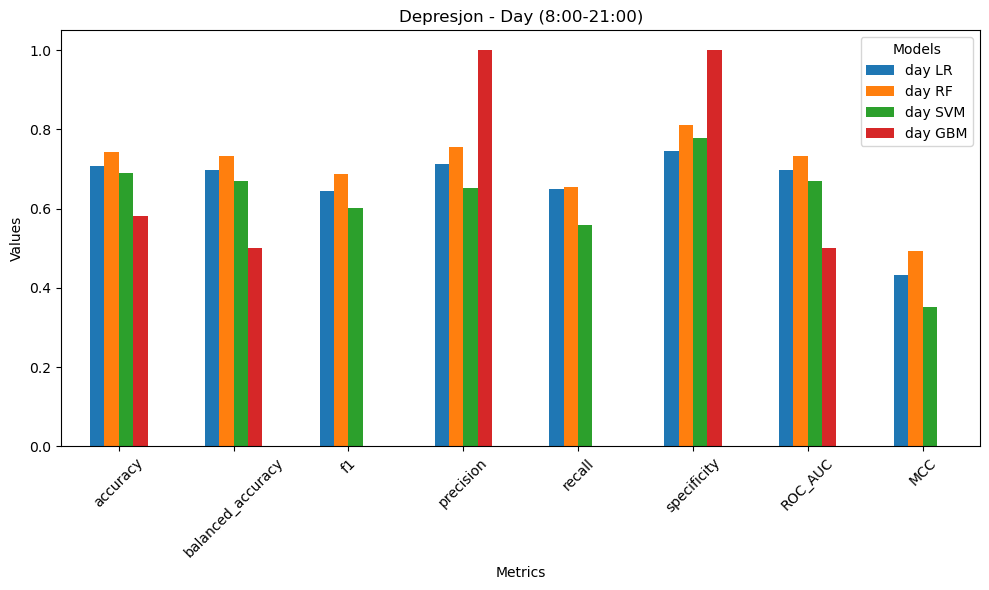

In [63]:
plot_final_results(results_depresjon_day_8_21, "Depresjon - Day (8:00-21:00)", one_plot=True)

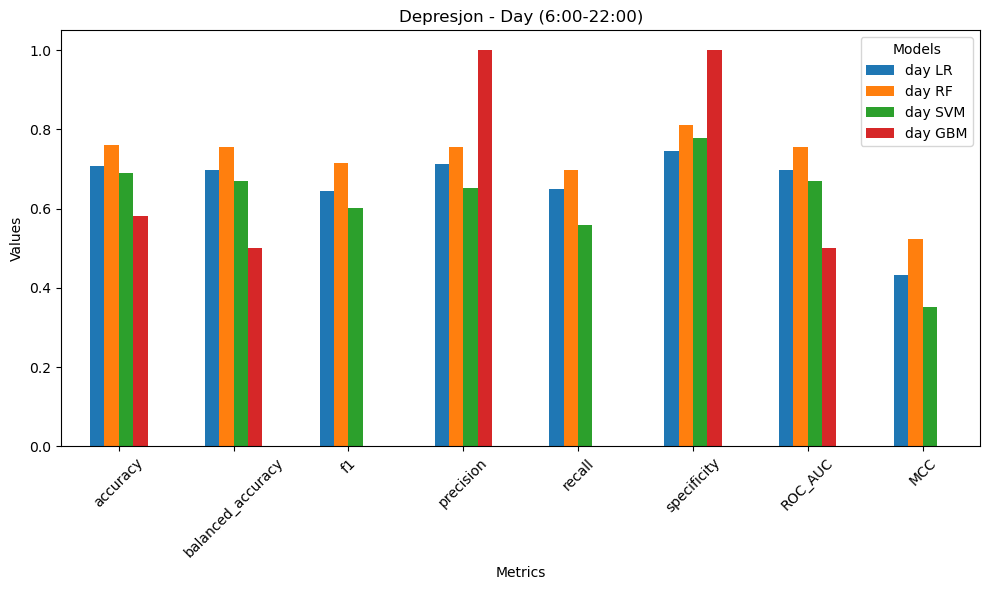

In [64]:
plot_final_results(results_depresjon_day_6_22, "Depresjon - Day (6:00-22:00)", one_plot=True)

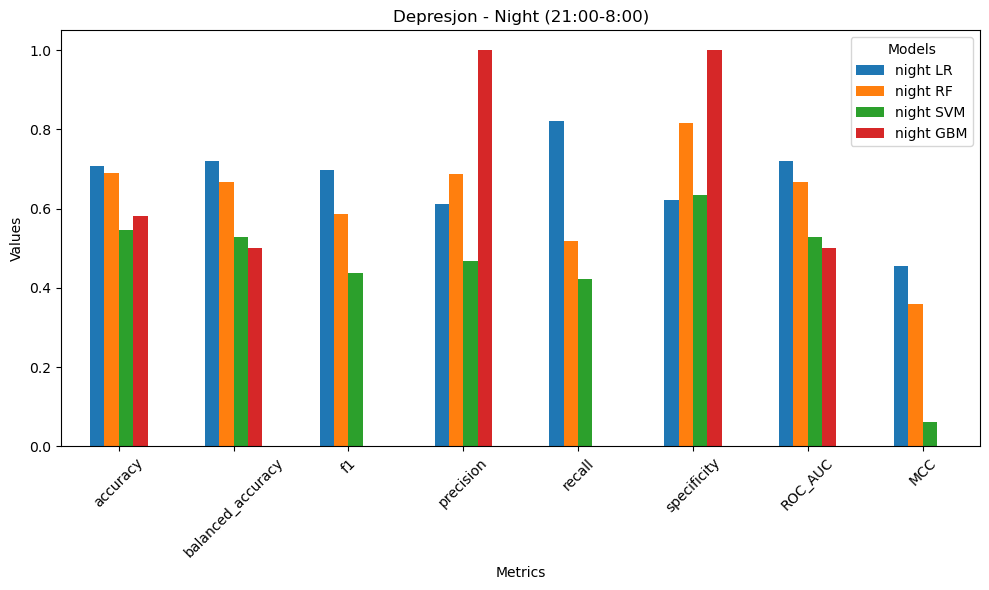

In [65]:
plot_final_results(results_depresjon_night_8_21, "Depresjon - Night (21:00-8:00)", one_plot=True)

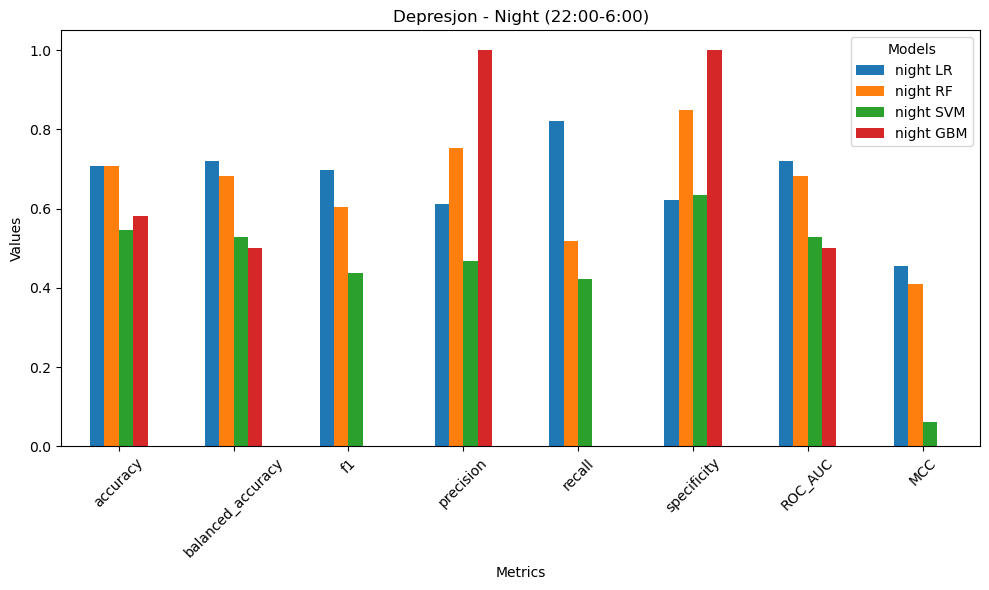

In [66]:
plot_final_results(results_depresjon_night_6_22, "Depresjon - Night (22:00-6:00)", one_plot=True)

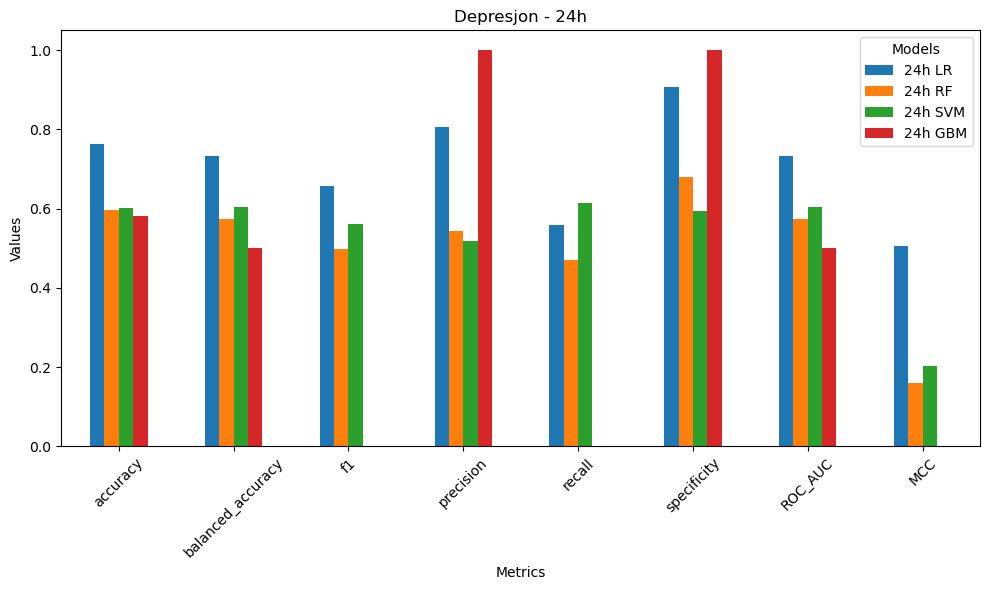

In [67]:
plot_final_results(results_depresjon_full_24h, "Depresjon - 24h", one_plot=True)

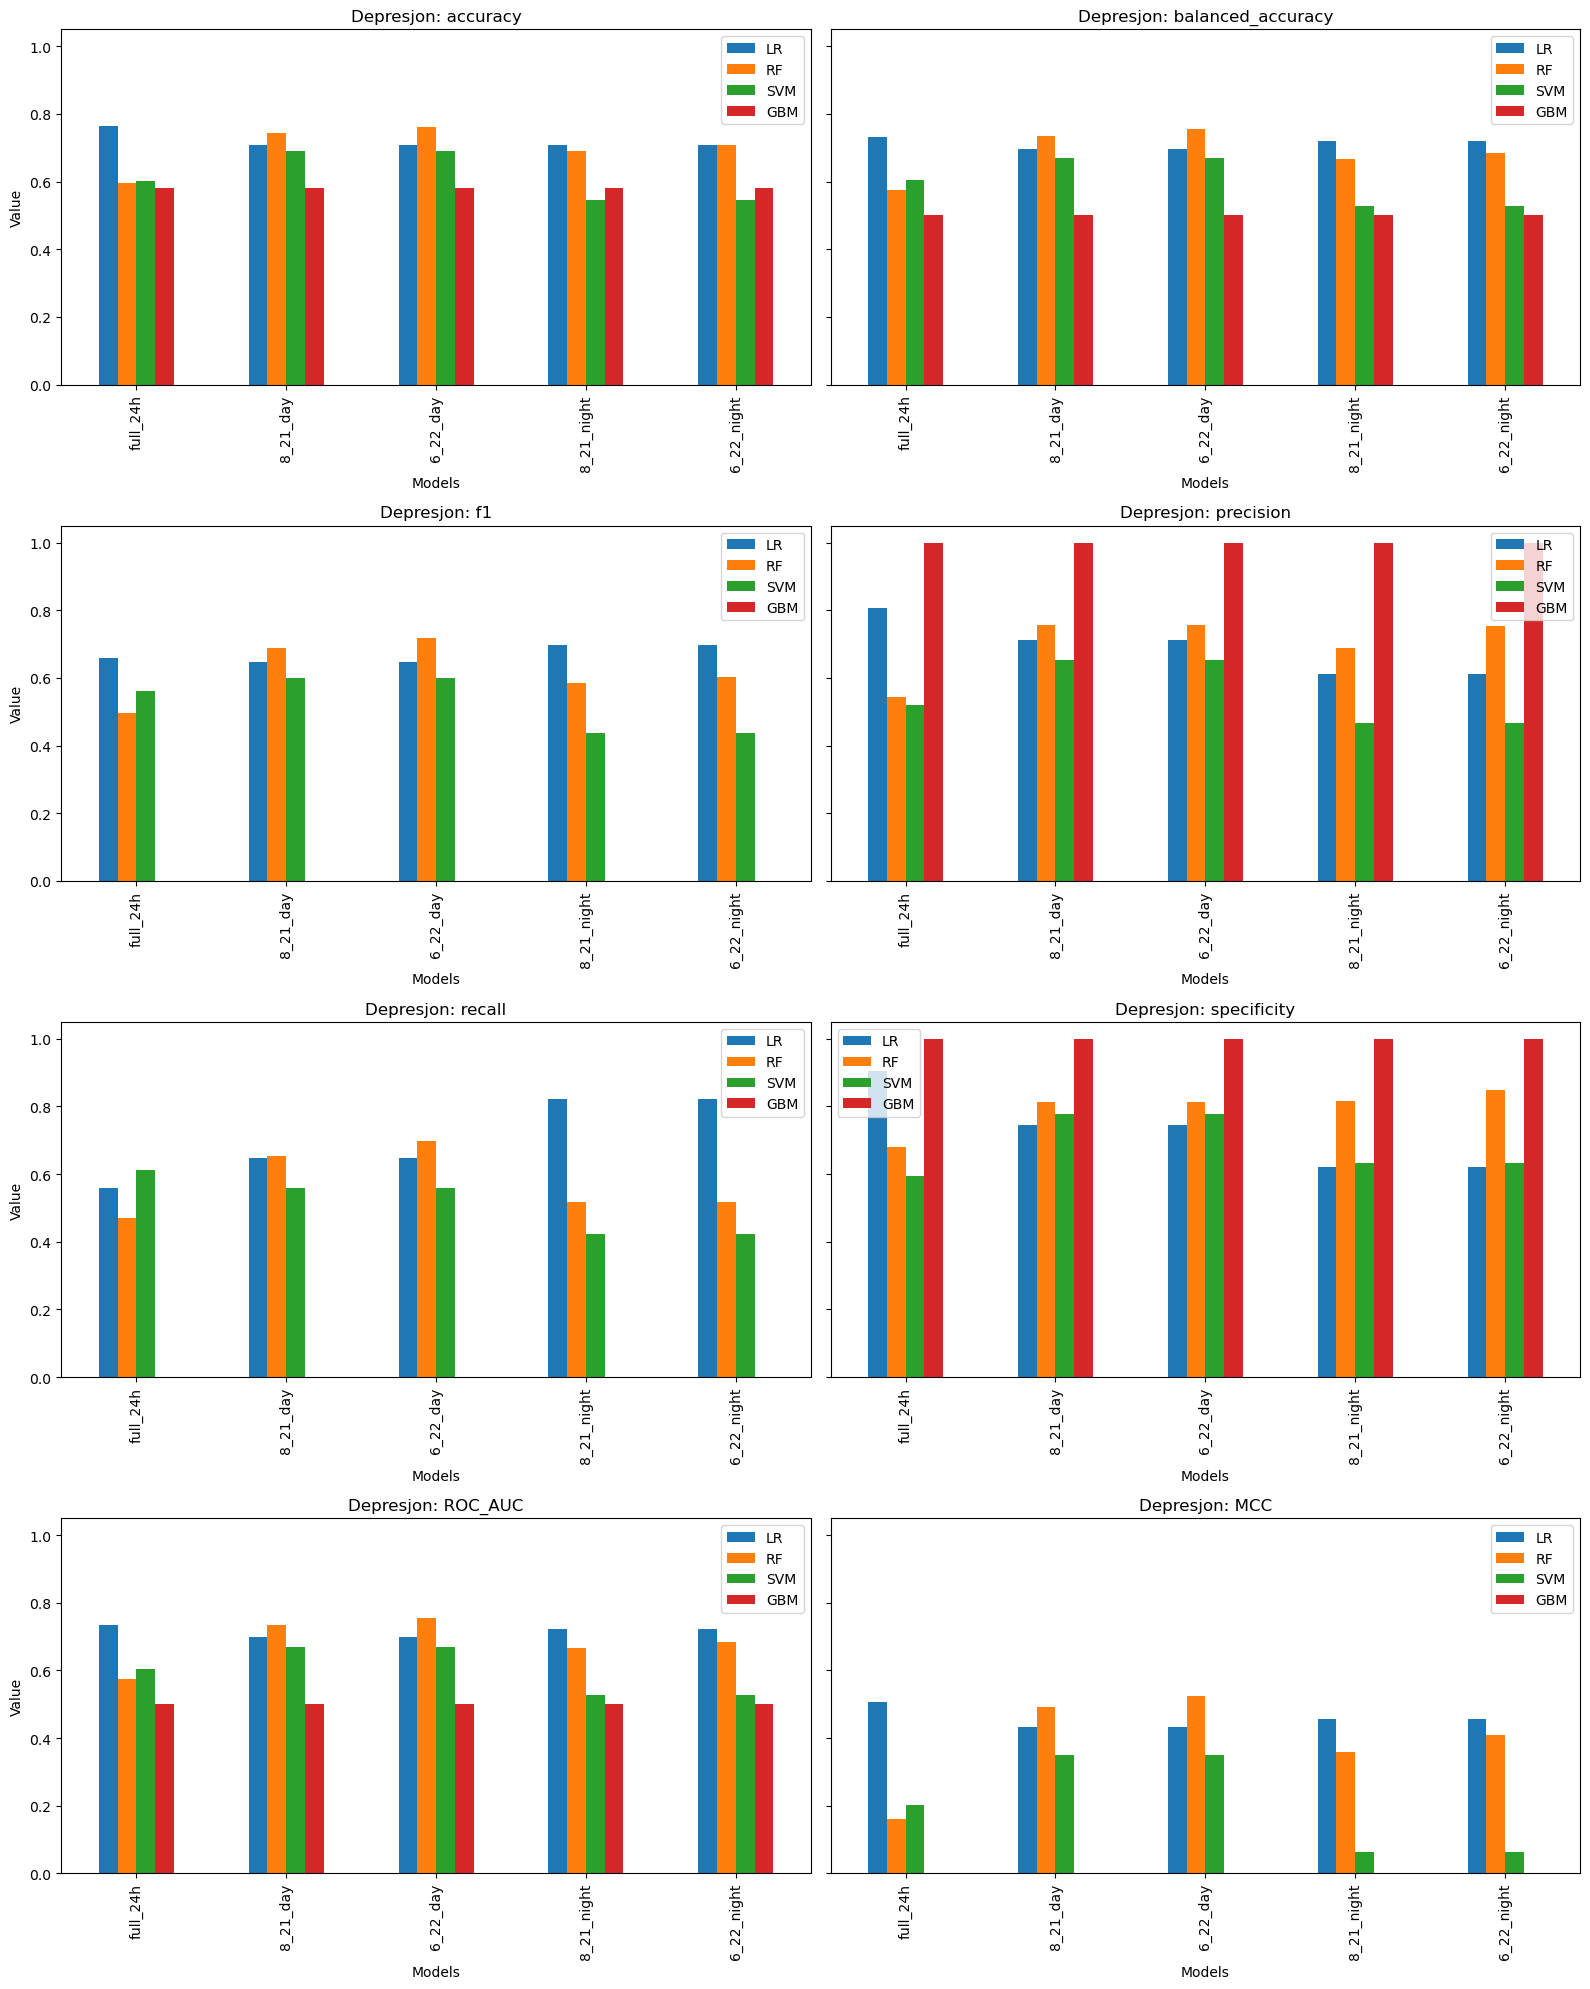

In [81]:
plot_model_comparison(all_models_results["depresjon"], "Depresjon", figsize=(16, 20))

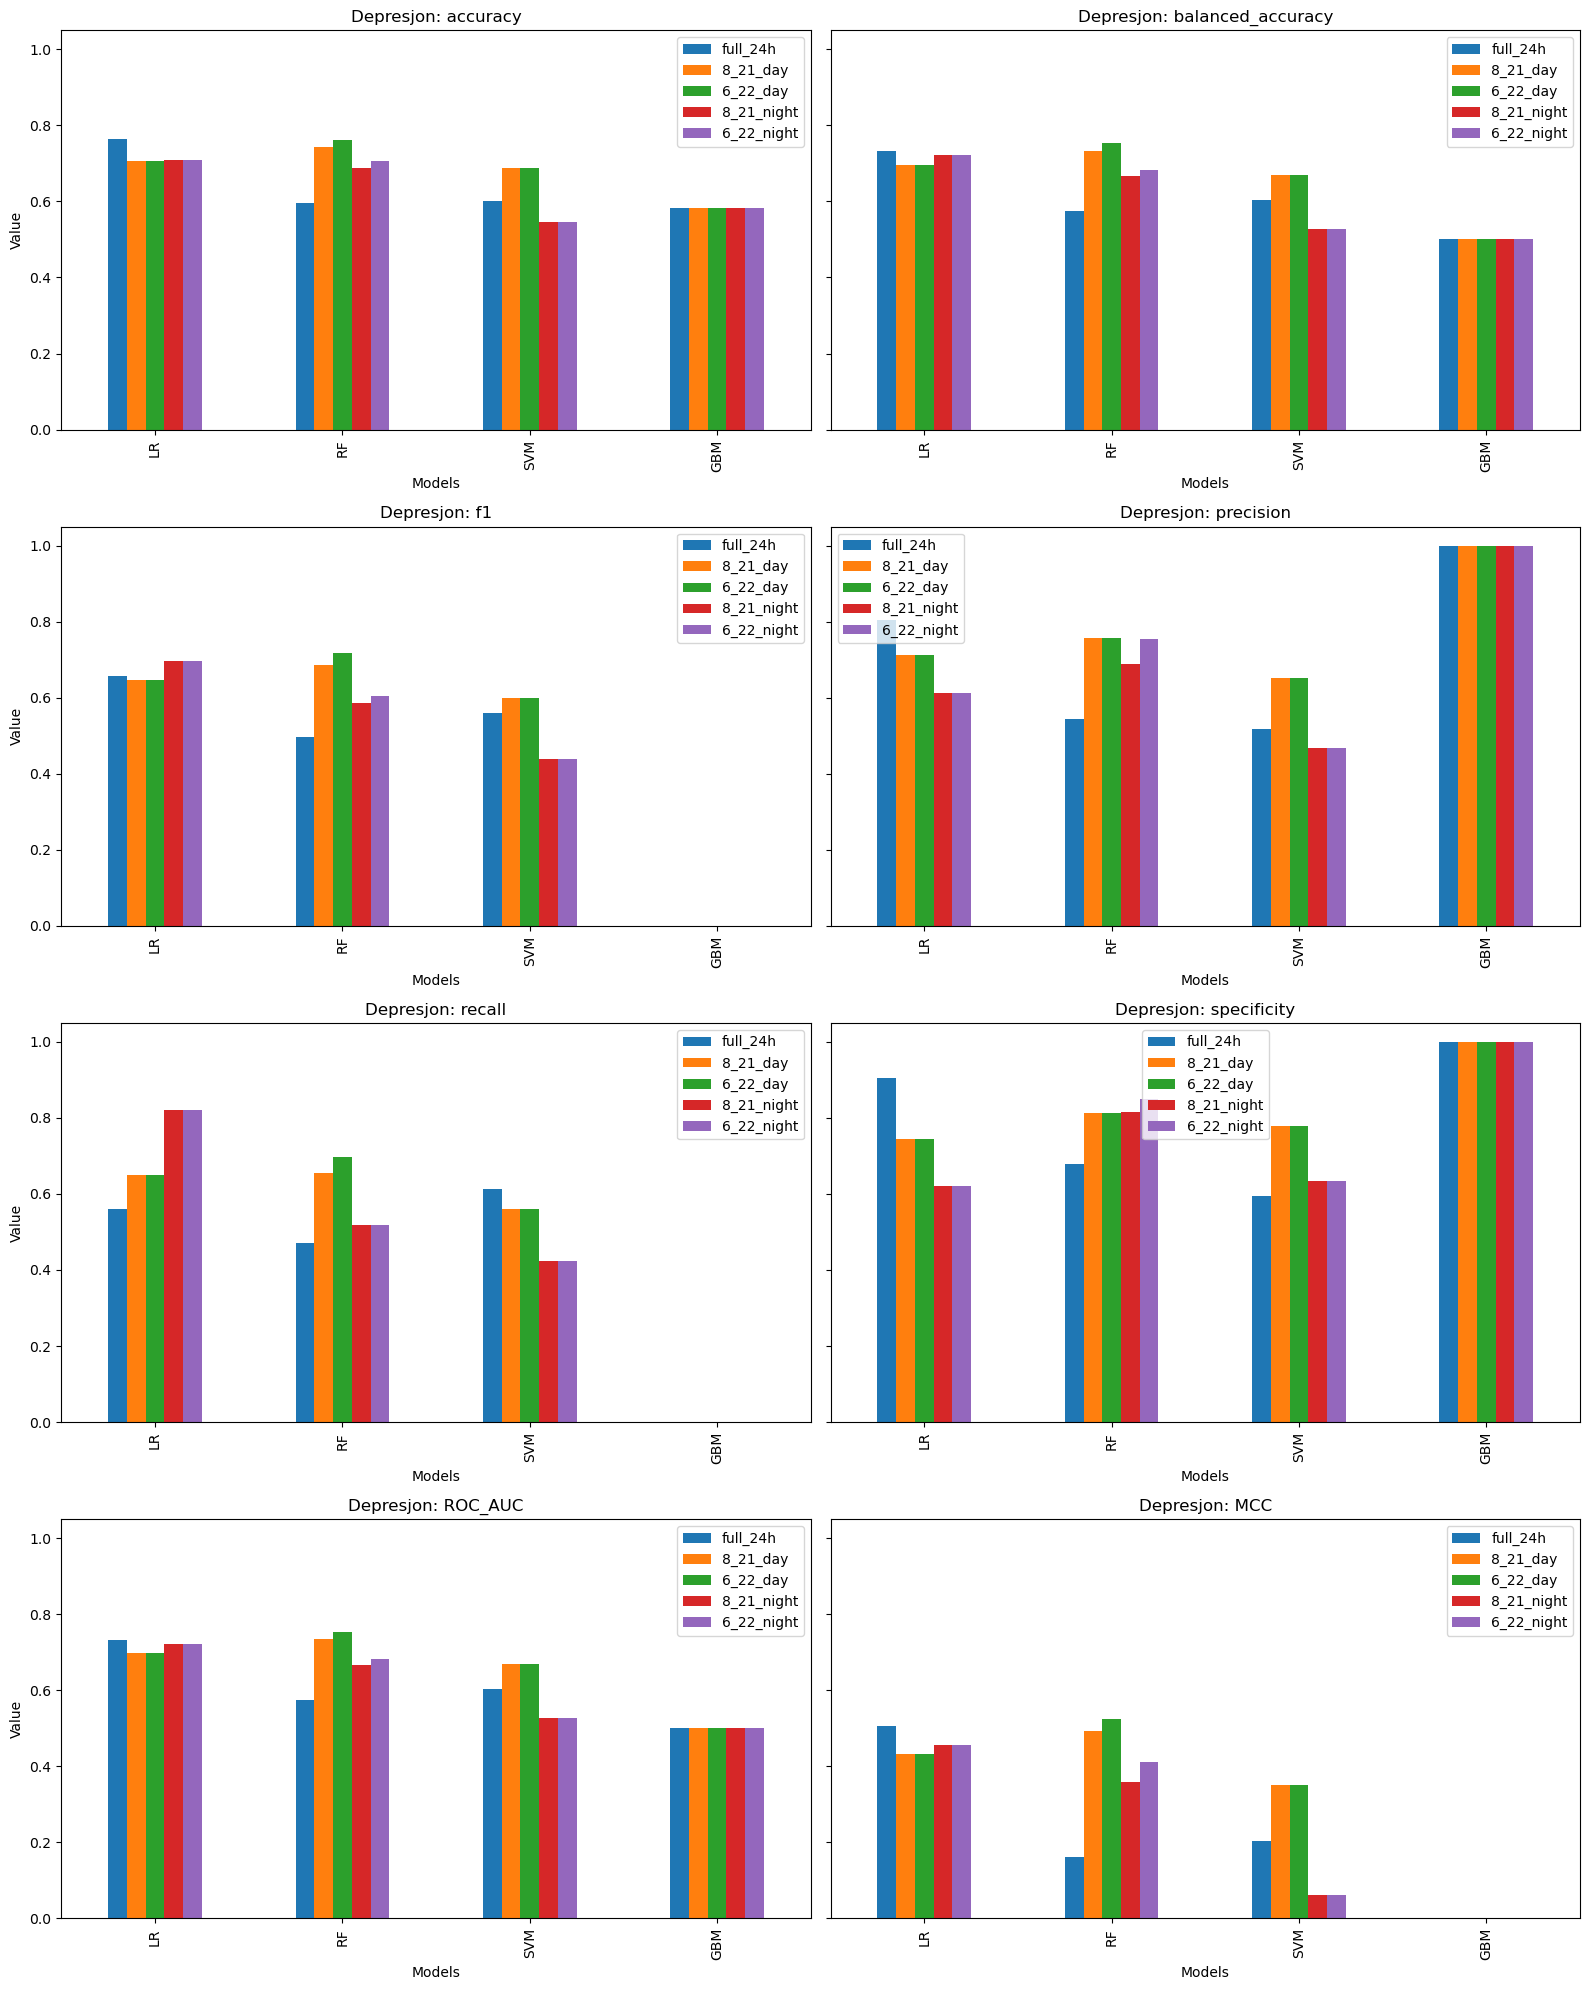

In [68]:
plot_day_night_full_comparison(all_models_results["depresjon"], "Depresjon", figsize=(16, 20))

### Psykose

In [70]:
path_to_psykose_results_folder = os.path.join(".", "results", "psykose")

In [71]:
results_psykose_day_8_21 = get_dataset_part_results(path_to_psykose_results_folder, day_8_21_models_scores)
results_psykose_day_6_22 = get_dataset_part_results(path_to_psykose_results_folder, day_6_22_models_scores)
results_psykose_night_8_21 = get_dataset_part_results(path_to_psykose_results_folder, night_8_21_models_scores)
results_psykose_night_6_22 = get_dataset_part_results(path_to_psykose_results_folder, night_6_22_models_scores)
results_psykose_full_24h = get_dataset_part_results(path_to_psykose_results_folder, full_24h_models_scores)

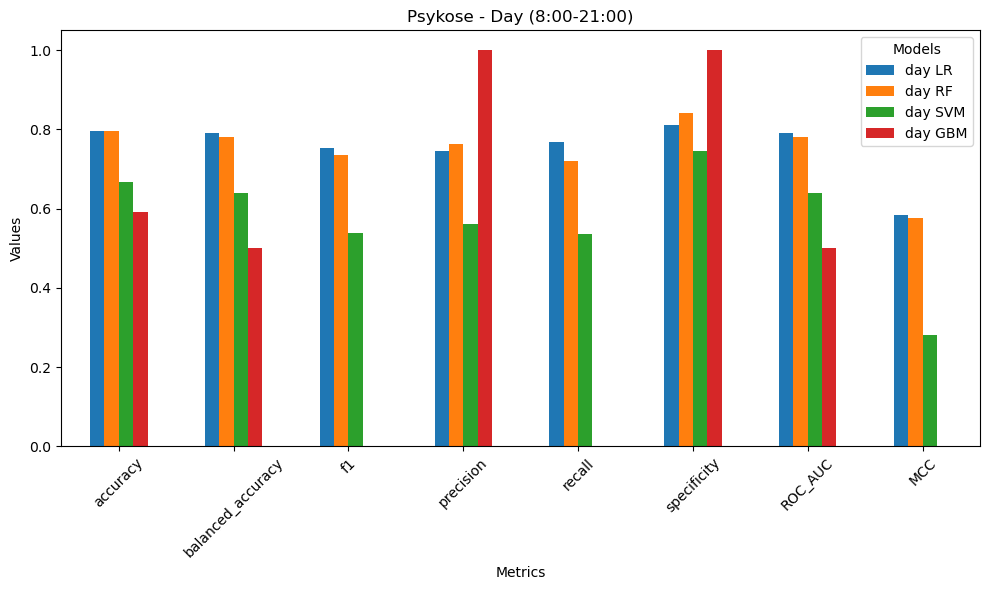

In [73]:
plot_final_results(results_psykose_day_8_21, "Psykose - Day (8:00-21:00)", one_plot=True)

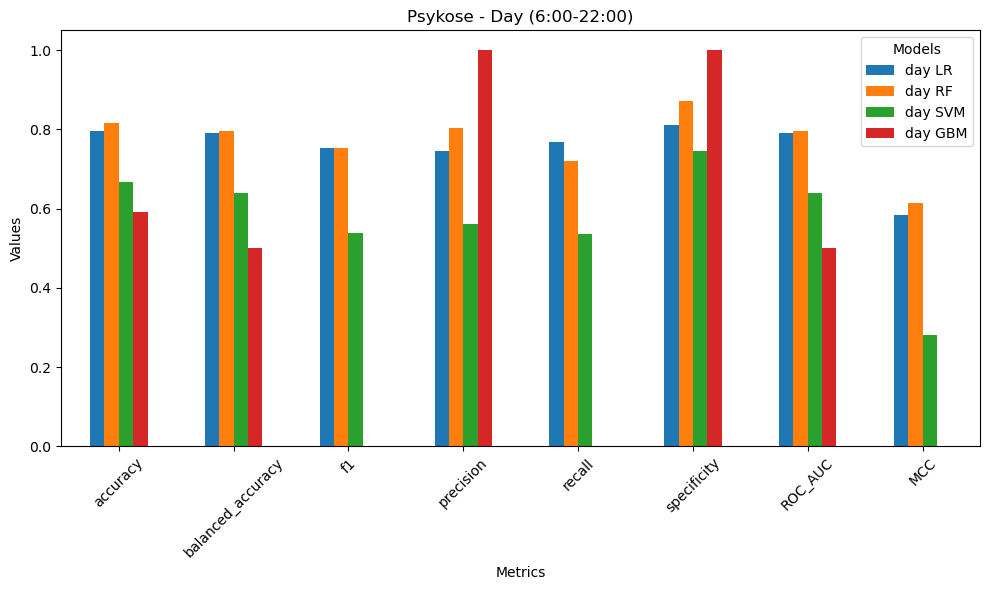

In [74]:
plot_final_results(results_psykose_day_6_22, "Psykose - Day (6:00-22:00)", one_plot=True)

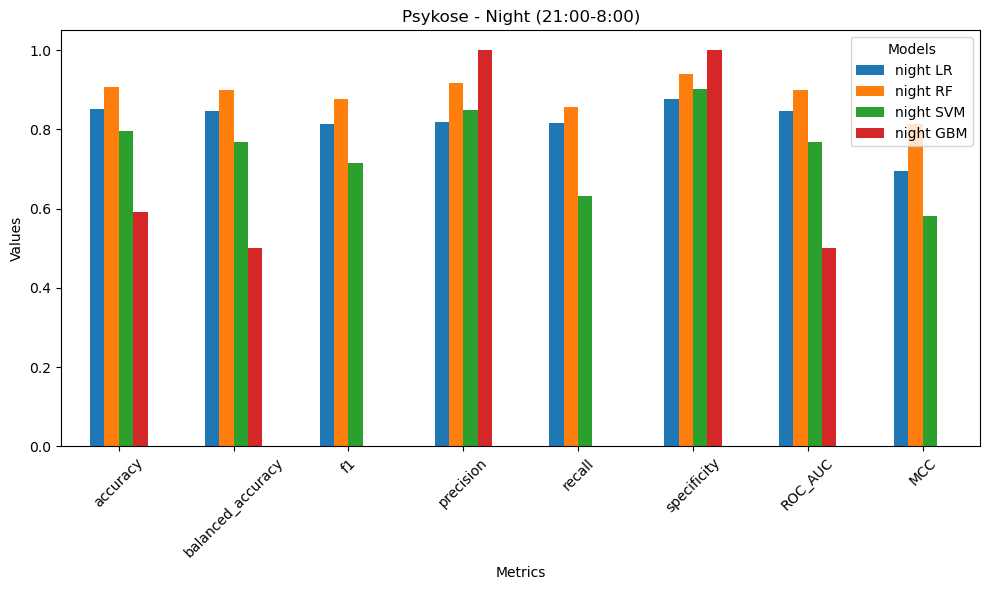

In [75]:
plot_final_results(results_psykose_night_8_21, "Psykose - Night (21:00-8:00)", one_plot=True)

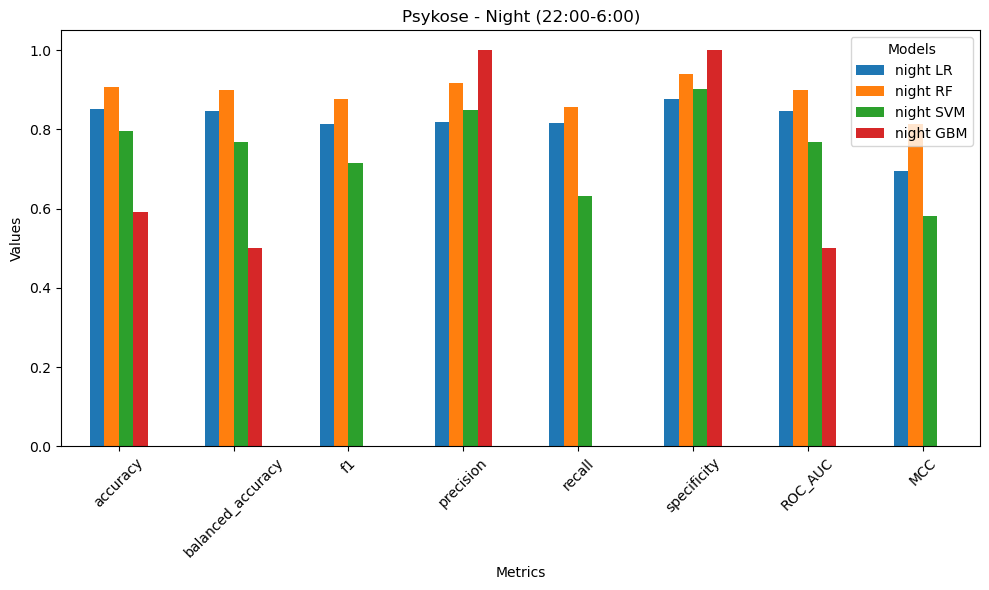

In [76]:
plot_final_results(results_psykose_night_6_22, "Psykose - Night (22:00-6:00)", one_plot=True)

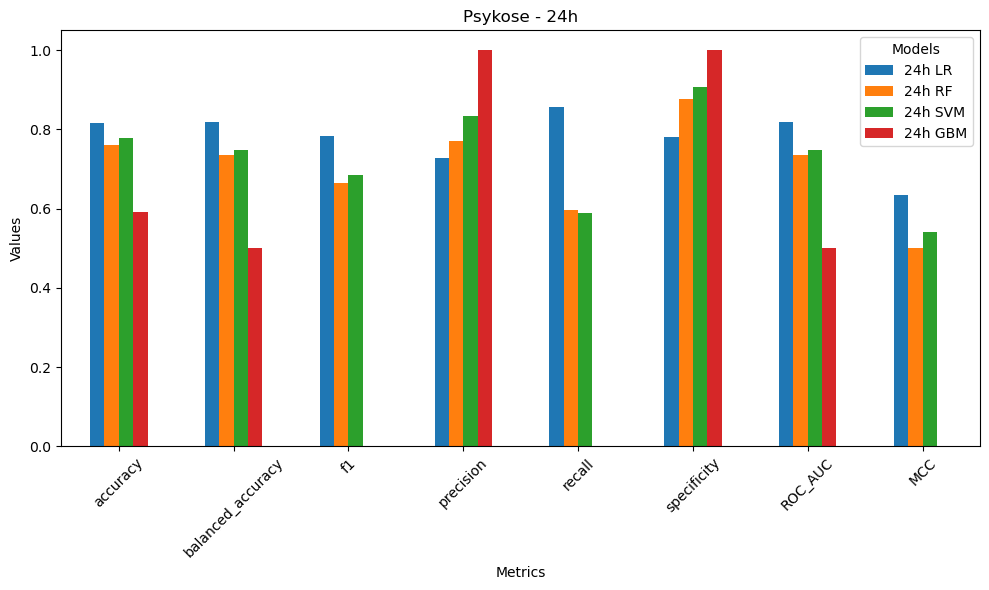

In [77]:
plot_final_results(results_psykose_full_24h, "Psykose - 24h", one_plot=True)

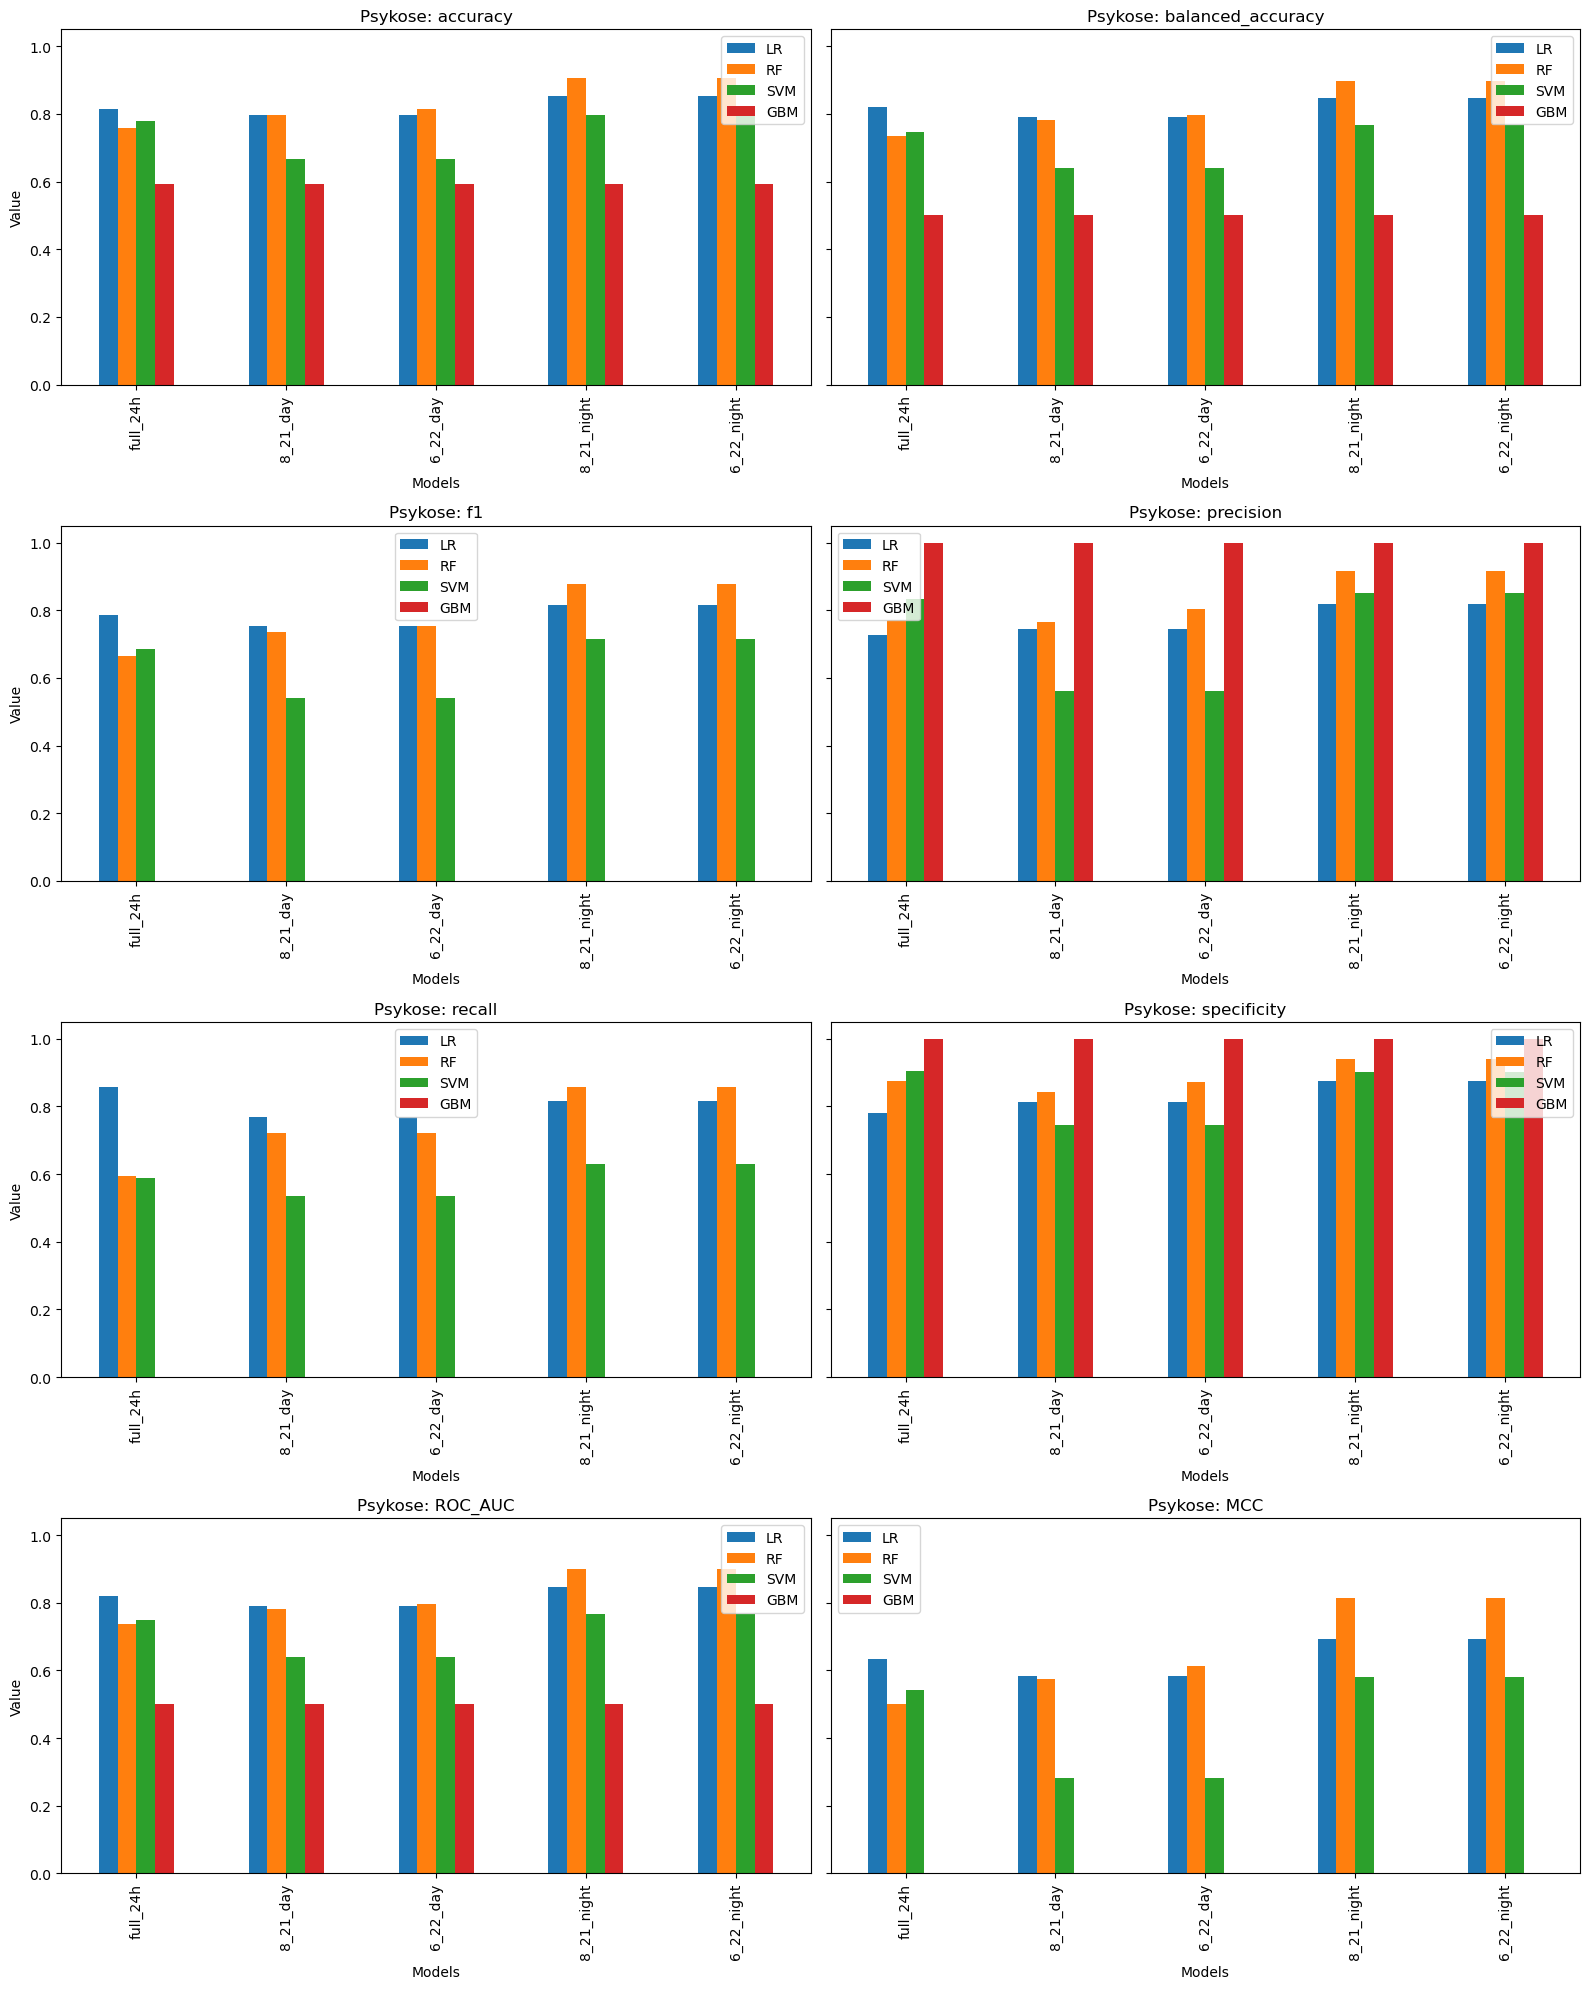

In [82]:
plot_model_comparison(all_models_results["psykose"], "Psykose", figsize=(16, 20))

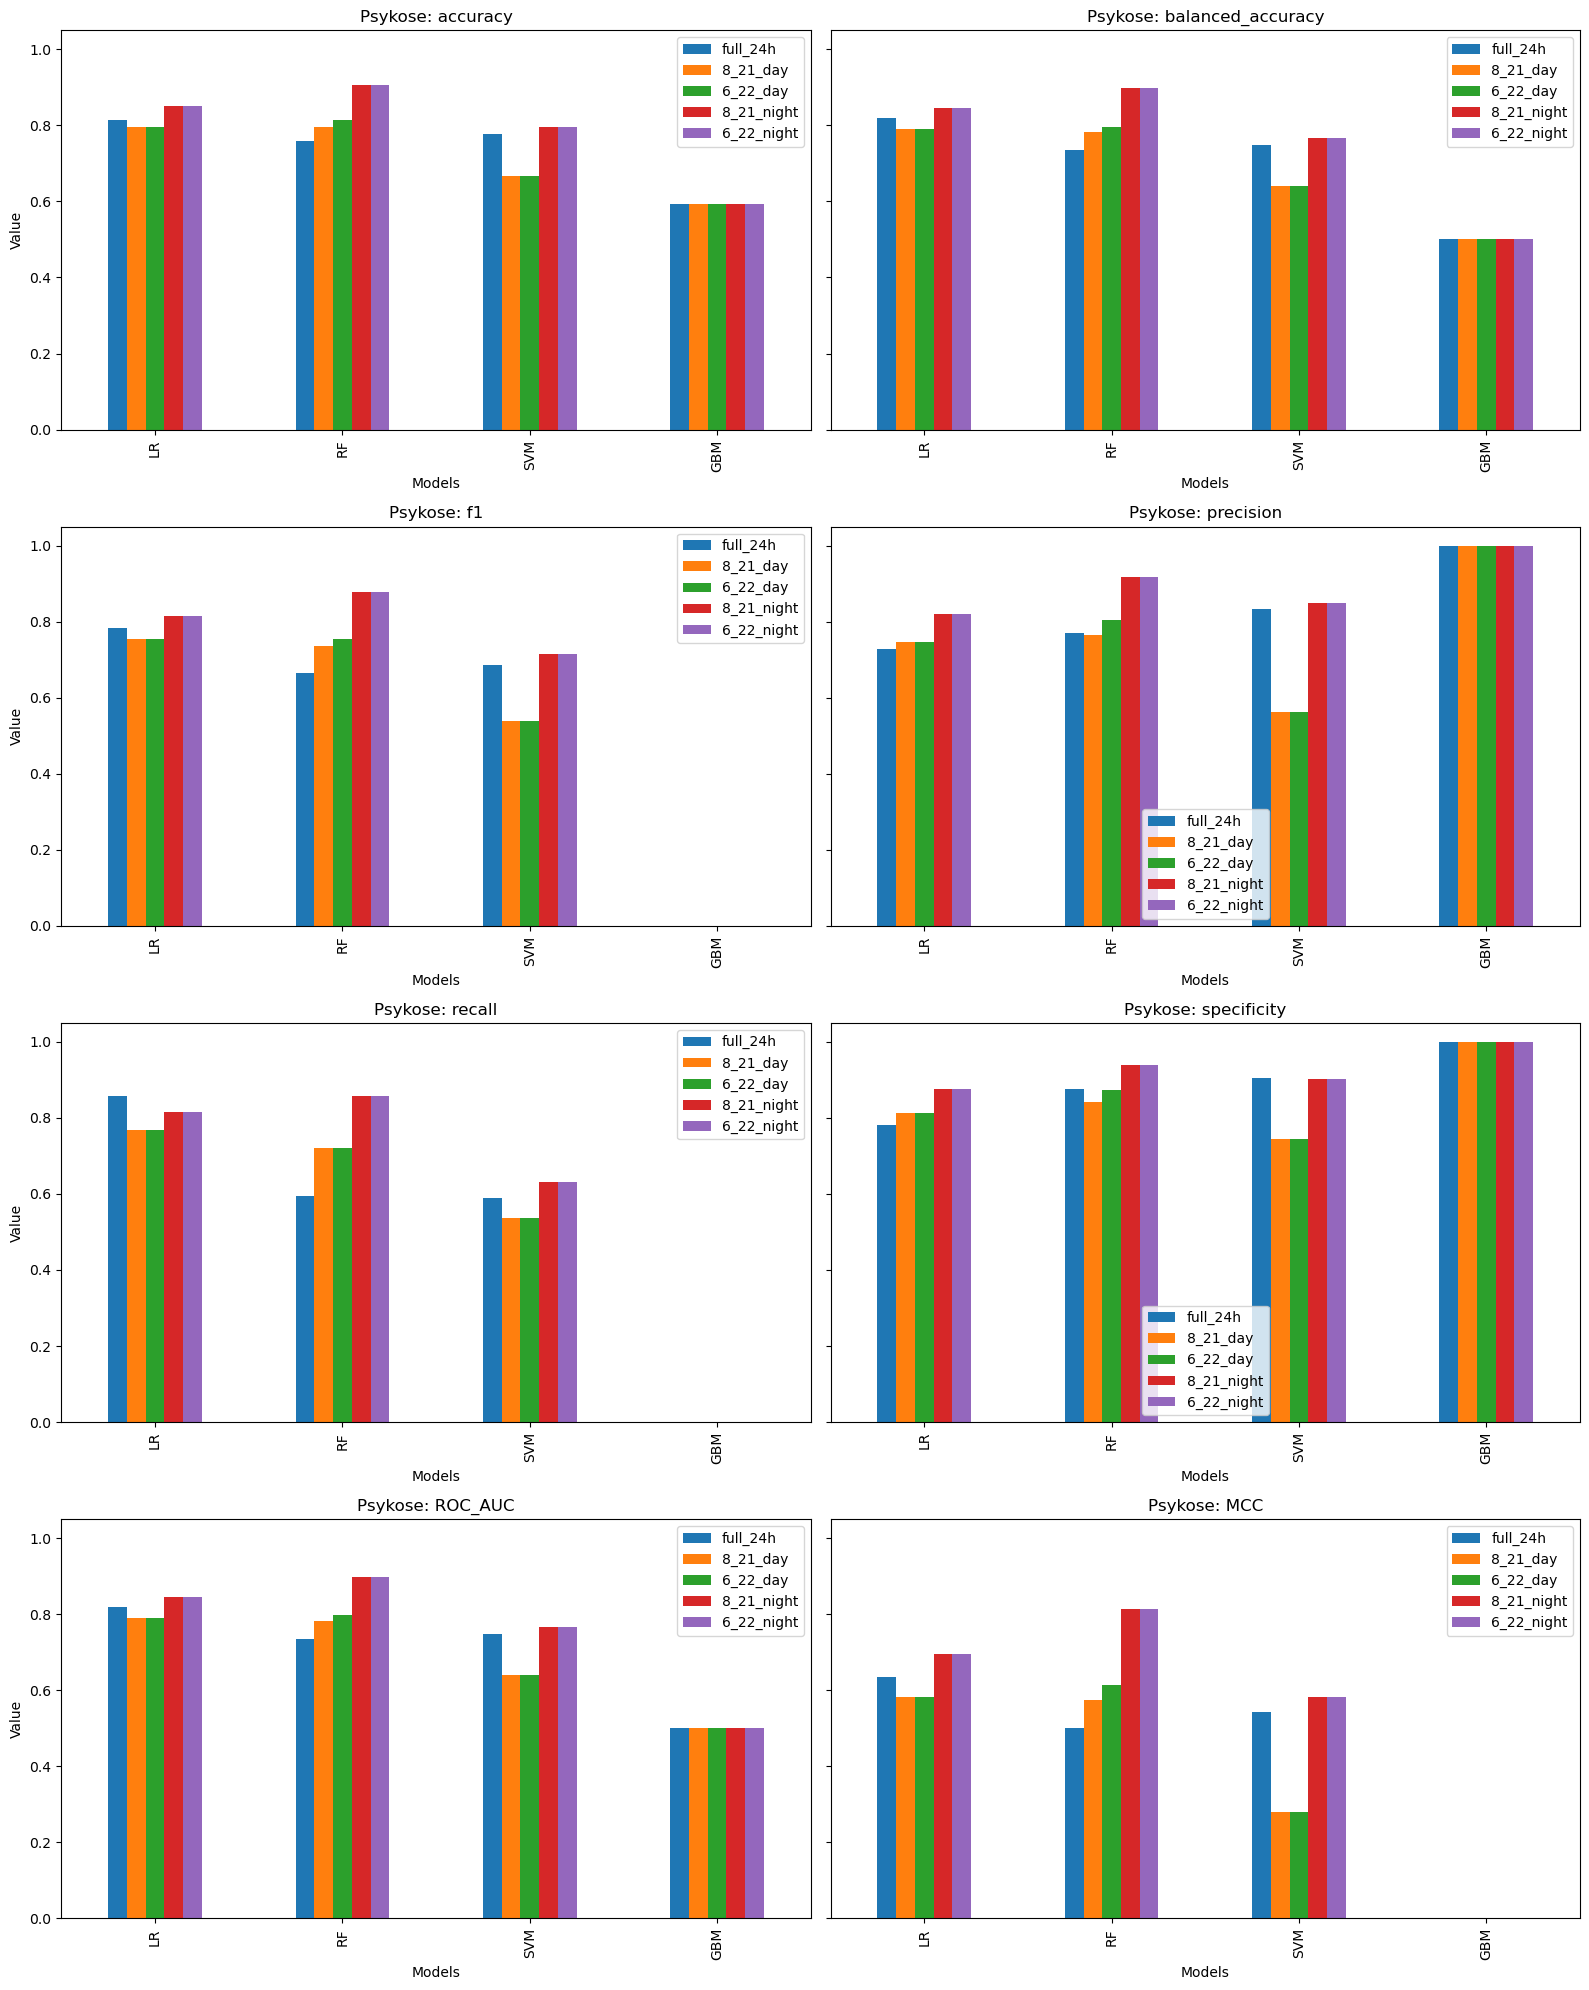

In [80]:
plot_day_night_full_comparison(all_models_results["psykose"], "Psykose", figsize=(16, 20))